In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [3]:
df = pd.read_csv('../input/fish-market/Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

> # **Correlation**

<AxesSubplot:>

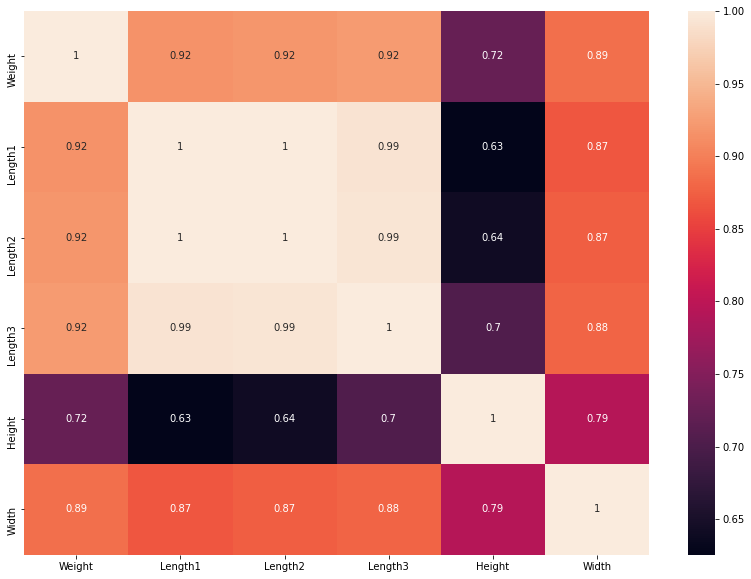

In [6]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [8]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


> # **Data Preprcessing**

In [9]:
y = df['Species']
x = df.drop('Species',axis=1)

In [10]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns = x.columns)

In [11]:
x

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


> ## **Training Data using logistic Regression**

In [12]:
x_train,x_test,y_train,y_test = tts(x,y,train_size=0.7,random_state=100)

In [13]:
LR = LogisticRegression()

In [14]:
model = LR.fit(x_train,y_train)

### **Performance**

In [15]:
model.score(x_test,y_test)

0.8333333333333334

> ## **Training the data using Tensorflow**

In [16]:
import tensorflow as tf

In [17]:
inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(16,activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(7,activation = 'softmax')(x)

nn_model = tf.keras.Model(inputs = inputs,outputs = outputs)

nn_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [18]:
batch_size = 32
epochs = 500

In [19]:
history = nn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size = batch_size,
    epochs = epochs

)

Epoch 1/500
3/3 [==============================] - 1s 231ms/step - loss: 1.9467 - accuracy: 0.1463 - val_loss: 2.0374 - val_accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 1.9160 - accuracy: 0.1019 - val_loss: 2.0036 - val_accuracy: 0.0000e+00
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 1.8863 - accuracy: 0.0458 - val_loss: 1.9722 - val_accuracy: 0.0435
Epoch 4/500
3/3 [==============================] - 0s 19ms/step - loss: 1.8386 - accuracy: 0.1172 - val_loss: 1.9439 - val_accuracy: 0.0435
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 1.8084 - accuracy: 0.1133 - val_loss: 1.9179 - val_accuracy: 0.0870
Epoch 6/500
3/3 [==============================] - 0s 21ms/step - loss: 1.7481 - accuracy: 0.1964 - val_loss: 1.8941 - val_accuracy: 0.1739
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 1.7871 - accuracy: 0.2322 - val_loss: 1.8709 - val_accuracy: 0.2609
Epoch 8/500

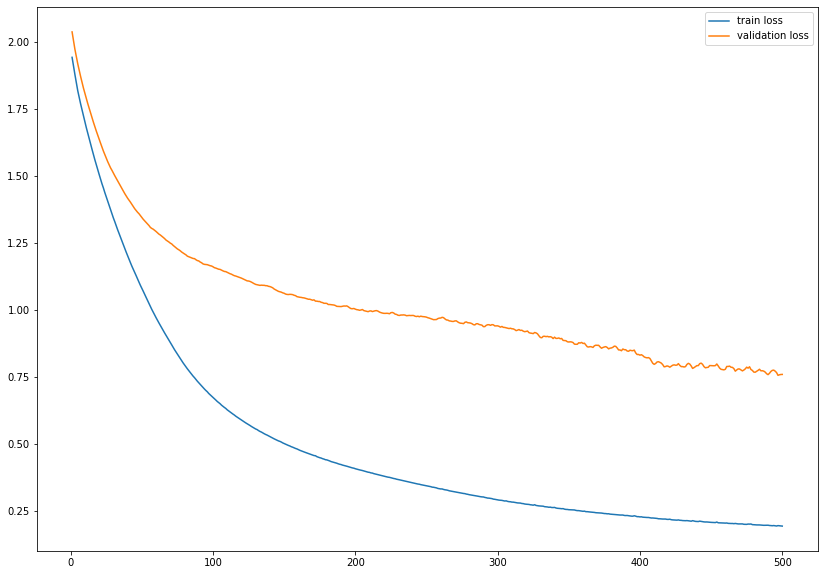

In [20]:
plt.figure(figsize=(14,10))
epochs_range = range(1,epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range,train_loss,label = "train loss")
plt.plot(epochs_range,val_loss,label = "validation loss")
plt.legend()
plt.show()

### **Performance**

In [21]:
nn_model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8958


[0.46436575055122375, 0.8958333134651184]